# Linear & polynomial classification problem

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
data=[]

f= open('data1.csv', 'r')
reader= csv.reader(f)
for line in reader:
    data.append(line)
f.close()

In [2]:
for i in range(len(data)):
    data[i]=list(map(float, data[i]))
    


In [41]:
data

[[34.62365962451697, 78.0246928153624, 0.0],
 [30.28671076822607, 43.89499752400101, 0.0],
 [35.84740876993872, 72.90219802708364, 0.0],
 [60.18259938620976, 86.30855209546826, 1.0],
 [79.0327360507101, 75.3443764369103, 1.0],
 [45.08327747668339, 56.3163717815305, 0.0],
 [61.10666453684766, 96.51142588489624, 1.0],
 [75.02474556738889, 46.55401354116538, 1.0],
 [76.09878670226257, 87.42056971926803, 1.0],
 [84.43281996120035, 43.53339331072109, 1.0],
 [95.86155507093572, 38.22527805795094, 0.0],
 [75.01365838958247, 30.60326323428011, 0.0],
 [82.30705337399482, 76.48196330235604, 1.0],
 [69.36458875970939, 97.71869196188608, 1.0],
 [39.53833914367223, 76.03681085115882, 0.0],
 [53.9710521485623, 89.20735013750205, 1.0],
 [69.07014406283025, 52.74046973016765, 1.0],
 [67.94685547711617, 46.67857410673128, 0.0],
 [70.66150955499435, 92.92713789364831, 1.0],
 [76.97878372747498, 47.57596364975532, 1.0],
 [67.37202754570876, 42.83843832029179, 0.0],
 [89.6767757507208, 65.79936592745237, 

In [3]:
data_0=[]
data_1=[]

for d in data:
    if d[2]==0:
        data_0.append(d)
    elif d[2]==1:
        data_1.append(d)

In [6]:
data_0_np=np.array(data_0)
data_1_np=np.array(data_1)


data_np=np.array(data)


In [7]:
X1_0=np.array([data_0_np[:,0]]).transpose()
X1_1=np.array([data_1_np[:,0]]).transpose()
X2_0=np.array([data_0_np[:,1]]).transpose()
X2_1=np.array([data_1_np[:,1]]).transpose()
y_0=np.array([data_0_np[:,2]]).transpose()
y_1=np.array([data_1_np[:,2]]).transpose()
X_0=np.array(data_0_np[:,:2])
X_1=np.array(data_1_np[:,:2])

X1=np.array([data_np[:,0]]).transpose()
X2=np.array([data_np[:,1]]).transpose()
X=np.append(np.ones((np.array(data_np[:,:2]).shape[0],1)),np.array(data_np[:,:2]), 1)
y=np.array([data_np[:,2]]).transpose()

initial_theta=np.zeros([X.shape[1], 1])

# normalizing

In [50]:
X_norm=np.ones(X.shape)
for i in range(1, X.shape[1]):
    X_norm[:,i]=(X[:,i]-(X[:,i].sum()/X[:,i].shape[0]))/(X[:,i].max()-X[:,i].min())

In [51]:
X3=X1**2
X4=X2**2
X5=X1*X2
X_poly=np.append(X, X3,1)
X_poly=np.append(X_poly, X4, 1)
X_poly=np.append(X_poly, X5, 1)

In [52]:
X_poly_norm=np.ones(X_poly.shape)
for i in range(1, X_poly.shape[1]):
    X_poly_norm[:,i]=(X_poly[:,i]-(X_poly[:,i].sum()/X_poly[:,i].shape[0]))/(X_poly[:,i].max()-X_poly[:,i].min())

# data plotting

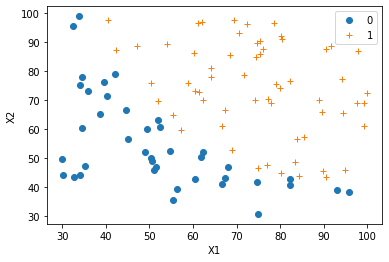

In [53]:
plt.plot(X1_0, X2_0, 'o', label='0')
plt.plot(X1_1, X2_1, '+', label='1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [80]:
def sigmoid(z):
    if(type(z)!=np.ndarray):
        try:
            return 1/(1+math.exp(-z))
        except OverflowError:
            return float('inf')
    else:
        g=np.zeros(z.shape)
        for i in range(z.shape[0]):
            try:
                g[i]=1/(1+math.exp(-z[i]))
            except OverflowError:
                g[i]=float('inf')
        return g
    
def log(x): #input type = np.ndarray, return type = np.ndarray
    g=np.zeros(x.shape)
    for i in range(x.shape[0]):
        try:
            g[i]=math.log(x[i])
        except OverflowError:
            g[i] = float('inf')
    return g

def costFunction(theta, X, y):
    m=y.shape[0]
    grad=np.zeros(theta.shape[0])
    J=(1/m)*(-np.dot(y.transpose(), log(sigmoid(np.dot(X, theta)))) - (np.dot((1-y).transpose(), log(1-sigmoid(np.dot(X, theta))))))
    grad=((1/m)*np.dot((sigmoid(np.dot(X, theta))-y).transpose(),X)).transpose()
    
    return [float(J), grad]

def forward(X, theta):
    return sigmoid(np.dot(X, theta))

def train(X, y):
    theta=np.zeros([X.shape[1], 1])
    print('Training start\tJ=', costFunction(theta, X, y)[0])
    print('grad :', costFunction(theta, X, y)[1])
    for epoch in range(1, epochs+1):
        [J, grad] = costFunction(theta, X, y)
        theta = theta- lr*grad
        
        if(epoch%(epochs/10)==0):
            print("epoch:", epoch+1, "cost:", J)
            print("theta:", theta)

            
    return theta

In [ ]:
30000
3000

# 학습되지 않은 decision boundary

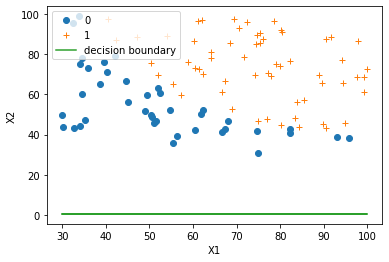

In [81]:
plt.plot(X1_0, X2_0, 'o', label='0')
plt.plot(X1_1, X2_1, '+', label='1')
plt.plot(X1, forward(X, initial_theta), label='decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [86]:
epochs=30000
lr=0.01
theta = train(X_norm, y)

Training start	J= 0.6931471805599453
grad : [[-0.1       ]
 [-0.0780402 ]
 [-0.06797865]]
epoch: 3001 cost: 0.47189376512711606
theta: [[0.43692905]
 [1.82172872]
 [1.60948626]]
epoch: 6001 cost: 0.3877764093340101
theta: [[0.49730519]
 [2.99049173]
 [2.67040602]]
epoch: 9001 cost: 0.3432731922833685
theta: [[0.5559606 ]
 [3.83514885]
 [3.45139682]]
epoch: 12001 cost: 0.31574482227552453
theta: [[0.60932883]
 [4.49607447]
 [4.07030621]]
epoch: 15001 cost: 0.29695537304013064
theta: [[0.65748465]
 [5.0398859 ]
 [4.58431214]]
epoch: 18001 cost: 0.2832606848002453
theta: [[0.70108941]
 [5.50262516]
 [5.02483946]]
epoch: 21001 cost: 0.2728061380144123
theta: [[0.74081163]
 [5.90584517]
 [5.41089946]]
epoch: 24001 cost: 0.26454734765855326
theta: [[0.77722288]
 [6.26343089]
 [5.7548535 ]]
epoch: 27001 cost: 0.25784992867234946
theta: [[0.81079274]
 [6.5848483 ]
 [6.06519562]]
epoch: 30001 cost: 0.2523053223688379
theta: [[0.84190413]
 [6.87684246]
 [6.34802109]]


gradient descent 방식으로 하니까 learning rate 선정도 까다롭고, 학습속도도 너무 느리다. 다른 방식을 써야 하나 싶다

In [87]:
plot_x=np.array(([X[:,1].min()-2, X[:,1].max()+2]))
avg=np.array([X[:,1].sum()/X[:,1].shape[0], X[:,1].sum()/X[:,1].shape[0]])
plot_y=((-1)/theta[2][0])*(theta[1][0]*(plot_x-avg)+theta[0][0])+[sum([X[:,2].min()-2, X[:,2].max()+2])/2,sum([X[:,2].min()-2, X[:,2].max()+2])/2]

In [88]:
plot_y

array([105.32022941,  25.40587061])

### 학습 된 Decision Boundary

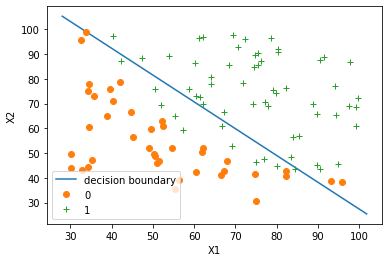

In [131]:
plt.plot(plot_x, plot_y, label='decision boundary')
plt.plot(X1_0, X2_0, 'o', label='0')
plt.plot(X1_1, X2_1, '+', label='1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [133]:
epochs=100000
lr=0.01
theta_norm = train(X_poly_norm, y)

Training start	J= 0.6931471805599453
grad : [[-0.1       ]
 [-0.0780402 ]
 [-0.06797865]
 [-0.07399532]
 [-0.06750749]
 [-0.09298631]]
epoch: 10001 cost: 0.2620706805140113
theta: [[0.88546151]
 [2.4845781 ]
 [2.18437584]
 [2.14355949]
 [1.97972719]
 [3.08704124]]
epoch: 20001 cost: 0.23086484889593387
theta: [[1.16385797]
 [3.26268773]
 [2.90563724]
 [2.60611337]
 [2.44837546]
 [4.26834418]]
epoch: 30001 cost: 0.21775829901332053
theta: [[1.34385679]
 [3.74770187]
 [3.36398134]
 [2.77877957]
 [2.6452384 ]
 [5.13486643]]
epoch: 40001 cost: 0.2098763519352039
theta: [[1.47590395]
 [4.10046306]
 [3.69939433]
 [2.82143565]
 [2.71594925]
 [5.85808107]]
epoch: 50001 cost: 0.2042068847153387
theta: [[1.57957983]
 [4.37668191]
 [3.96265499]
 [2.79006934]
 [2.71381627]
 [6.49687186]]
epoch: 60001 cost: 0.1996735602131797
theta: [[1.66464038]
 [4.60298556]
 [4.17856731]
 [2.71166325]
 [2.66508393]
 [7.07912941]]
epoch: 70001 cost: 0.1958018823835127
theta: [[1.7366856 ]
 [4.79438943]
 [4.361254

In [134]:
res=forward(X_poly_norm, theta_norm)

for i in range(len(res)):
    if(res[i]>=0.5):
        res[i]=1
    else:
        res[i]=0

In [166]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res


def plotDecisionBoundary(theta, degree, axes):
    u = np.linspace(25, 110, 80)
    v = np.linspace(25, 110, 80)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['1', '0', 'Decision Boundary'])
    return cs

In [167]:
np.linspace(-1, 1.5, 50)

array([-1.        , -0.94897959, -0.89795918, -0.84693878, -0.79591837,
       -0.74489796, -0.69387755, -0.64285714, -0.59183673, -0.54081633,
       -0.48979592, -0.43877551, -0.3877551 , -0.33673469, -0.28571429,
       -0.23469388, -0.18367347, -0.13265306, -0.08163265, -0.03061224,
        0.02040816,  0.07142857,  0.12244898,  0.17346939,  0.2244898 ,
        0.2755102 ,  0.32653061,  0.37755102,  0.42857143,  0.47959184,
        0.53061224,  0.58163265,  0.63265306,  0.68367347,  0.73469388,
        0.78571429,  0.83673469,  0.8877551 ,  0.93877551,  0.98979592,
        1.04081633,  1.09183673,  1.14285714,  1.19387755,  1.24489796,
        1.29591837,  1.34693878,  1.39795918,  1.44897959,  1.5       ])

C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: No contour levels were found within the data range.


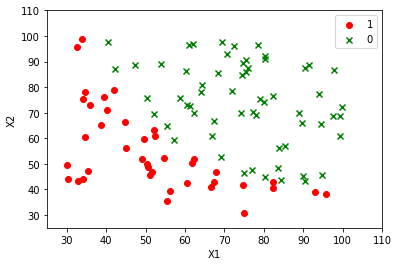

In [173]:
fig, axes = plt.subplots();
axes.set_xlabel('X1')
axes.set_ylabel('X2')
axes.scatter(X1_0, X2_0, color = 'r', marker='o', label='Faulty')
axes.scatter(X1_1, X2_1, color = 'g', marker='x', label='Good')
#axes.legend(title='Legend', loc = 'best' )

degree=2

plotDecisionBoundary(theta_norm, degree, axes)